In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

C:\Users\ADIAX\AppData\Local\Temp\ipykernel_18500\2690998774.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
class LogisticRegression:
    def __init__(self, learningRate, tolerance, regularization=False, lambda_param=0.1, maxIteration=50000):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.regularization = regularization
        self.lambda_param = lambda_param
        self.maxIteration = maxIteration
        
    def datasetReader(self):
        breast_cancer = load_breast_cancer()
        X, y =  breast_cancer.data, breast_cancer.target
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_train, y_train, X_test, y_test
    
    def normalize_data(self, X):
        # Normalizing each feature (column-wise)
        X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)
        return X_normalized
    
    def normalize_train_test_data(self, X_train, X_test):
        # Normalize training data
        self.X_train = self.normalize_data(X_train)
        # Normalize test data
        self.X_test = self.normalize_data(X_test)
    
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0], 1]), X])
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def decision_boundary(self, X, w):
        # Plot decision boundary
        if X.shape[1] == 2:
            a = -w[0] / w[1]
            b = -w[2] / w[1]
            x1 = np.linspace(-5, 5, 100)
            x2 = -(w[0] + w[1] * x1) / w[2]
            plt.plot(x1, x2, label='Decision Boundary')
            plt.scatter(X[:, 0], X[:, 1], c=self.y_train, cmap='viridis')
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.legend()
            plt.show()
        else:
            print("Cannot plot decision boundary for datasets with more than two features.")
        
    def costFunction(self, X, y):
        z = X.dot(self.w)
        h = self.sigmoid(z)
        epsilon = 1e-5  # to prevent log(0) case
        regularization_term = 0
        if self.regularization:
            regularization_term = (self.lambda_param / (2 * X.shape[0])) * np.sum(self.w[1:]**2)  # Exclude bias term
        cost = -np.mean(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon)) + regularization_term
        return cost
    
    def gradient(self, X, y):
        z = X.dot(self.w)
        h = self.sigmoid(z)
        grad = np.dot(X.T, (h - y)) / y.size
        if self.regularization:
            grad[1:] += (self.lambda_param / X.shape[0]) * self.w[1:]  # Exclude bias term
        return grad
    
    def gradientDescent(self, X, y):
        cost_sequences = []
        last_cost = float('inf')
        for i in tqdm(range(self.maxIteration)):
            self.w = self.w - self.learningRate * self.gradient(X, y)
            cur_cost = self.costFunction(X, y)
            diff = last_cost - cur_cost
            last_cost = cur_cost
            cost_sequences.append(cur_cost)
            if diff < self.tolerance:
                print('The model stopped: Converged')
                break
                
        self.plotCost(cost_sequences)
        return 
    
    def plotCost(self, error_sequences):
        plt.plot(error_sequences)
        plt.xlabel('Iteration')
        plt.ylabel('Error')
        plt.title('Cost Function')
        plt.show()
                        
    def predict(self, X):
        z = X.dot(self.w)
        return np.round(self.sigmoid(z))
    
    def evaluate(self, y, y_hat):
        accuracy = np.mean(y == y_hat)
        precision = np.sum((y == 1) & (y_hat == 1)) / np.sum(y_hat)
        recall = np.sum((y == 1) & (y_hat == 1)) / np.sum(y)
        return accuracy, precision, recall
    
    def fit(self):
        X_train, y_train, X_test, y_test = self.datasetReader()
        self.normalize_train_test_data(X_train, X_test)  # Normalize train and test data
        self.X_train = self.addX0(self.X_train)  # Add intercept term
        self.X_test = self.addX0(self.X_test)    # Add intercept term
        if self.regularization:
            print('Solving using Gradient Descent Regularization: Enabled')
        else:
            print('Solving using Gradient Descent Regularization: Disabled')
        self.w = np.random.randn(self.X_train.shape[1])  # Initialize weights randomly
        self.gradientDescent(self.X_train, y_train)
        # Prediction and Evaluation on Test Data
        y_hat_test = self.predict(self.X_test)
        print("\nPredicted classes on test data:", y_hat_test)
        print("Actual classes on test data:", y_test)
        accuracy_test, precision_test, recall_test = self.evaluate(y_test, y_hat_test)
        print('\nEvaluation for test data:')
        print('Accuracy:', accuracy_test)
        print('Precision:', precision_test)
        print('Recall:', recall_test)
        self.decision_boundary(X_train, self.w)

Solving using Gradient Descent Regularization: Enabled


  0%|          | 0/50000 [00:00<?, ?it/s]

  4%|▍         | 2164/50000 [00:01<00:25, 1860.14it/s]


The model stopped: Converged


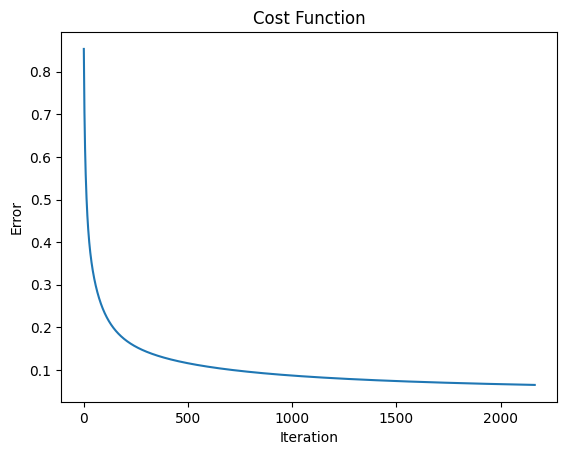


Predicted classes on test data: [1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
Actual classes on test data: [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]

Evaluation for test data:
Accuracy: 0.9824561403508771
Precision: 0.9859154929577465
Recall: 0.9859154929577465
Cannot plot decision boundary for datasets with more than two features.


In [3]:
model = LogisticRegression(learningRate=0.1, tolerance=1e-5, regularization=True, lambda_param=0.01)
model.fit()

Solving using Gradient Descent Regularization: Disabled


  0%|          | 0/50000 [00:00<?, ?it/s]

  2%|▏         | 1090/50000 [00:00<00:22, 2176.85it/s]


The model stopped: Converged


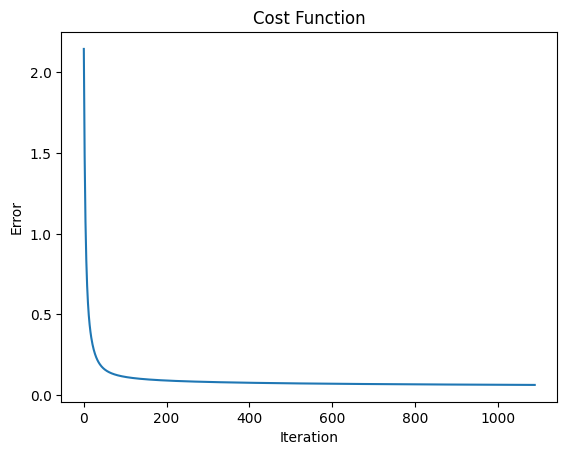


Predicted classes on test data: [1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
Actual classes on test data: [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]

Evaluation for test data:
Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0
Cannot plot decision boundary for datasets with more than two features.


In [4]:
model2 = LogisticRegression(learningRate=0.1, tolerance=1e-5, regularization=False, lambda_param=0.1)
model2.fit()